<a href="https://colab.research.google.com/github/rohanw2004/Real-time-face-mask-detection-using-cnn-group-work-/blob/main/real_time_face_mask_detection_using_cnn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

IMPORTING FACE MASK DETECTION

In [3]:
#API to fetch the datasets fro kaggle
#!/bin/bash
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls


data			    face-mask-dataset.zip  kaggle.json	test.png
data_for_face_mask_dec.zip  japan.jpg		   sample_data	woman.jpg


importing the dependies


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_692.jpg', 'with_mask_2192.jpg', 'with_mask_2763.jpg', 'with_mask_1592.jpg', 'with_mask_2632.jpg']
['with_mask_1460.jpg', 'with_mask_2651.jpg', 'with_mask_2338.jpg', 'with_mask_2987.jpg', 'with_mask_3028.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2195.jpg', 'without_mask_2727.jpg', 'without_mask_1787.jpg', 'without_mask_111.jpg', 'without_mask_3649.jpg']
['without_mask_2759.jpg', 'without_mask_1219.jpg', 'without_mask_3151.jpg', 'without_mask_1413.jpg', 'without_mask_75.jpg']


In [9]:
print('Number of mask images', len(with_mask_files))
print('Number of without mask images', len(without_mask_files))

Number of mask images 3725
Number of without mask images 3828


CREATING LABELS FOR THE TWO CLASS OF IMAGES

 WITH MASK ----> 1


 WITHOUT MASK ---->0

In [10]:
#CREATING A LABEL

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


DISPLAY THE IMAGES


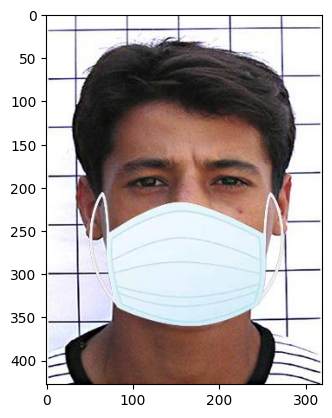

In [14]:
#display with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1029.jpg')
plt.imshow(img)
plt.show()

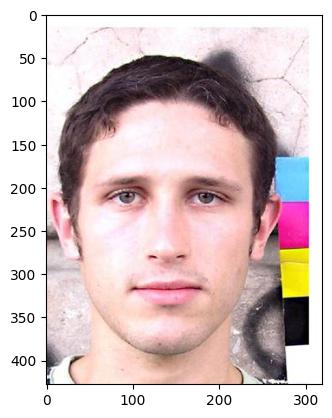

In [15]:
#display with mask image
img = mpimg.imread('//content/data/without_mask/without_mask_1234.jpg')
plt.imshow(img)
plt.show()

1.RESIZE THE IMAGES

2.CONVERT IT INTO NUMPY ARRAY

In [16]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow


# Define the directories
with_mask_path ='/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

# Get the list of files
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)


#converting it into numpy array
data = []

for img_file in with_mask_files:
  try:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
  except Exception as e:
    print(f"Error processing {img_file}: {e}")


for img_file in without_mask_files:
  try:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
  except Exception as e:
    print(f"Error processing {img_file}: {e}")

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 48,  22,  31],
        [ 47,  21,  30],
        [ 44,  18,  27],
        ...,
        [225, 222, 231],
        [225, 222, 231],
        [224, 221, 230]],

       [[ 48,  22,  31],
        [ 50,  25,  32],
        [ 54,  28,  36],
        ...,
        [226, 223, 231],
        [227, 224, 233],
        [226, 224, 232]],

       [[ 59,  31,  40],
        [ 63,  36,  43],
        [ 70,  43,  49],
        ...,
        [222, 219, 229],
        [224, 220, 230],
        [225, 221, 231]],

       ...,

       [[ 13,   6,  24],
        [ 12,   5,  23],
        [ 10,   3,  21],
        ...,
        [105,  75,  76],
        [ 79,  52,  56],
        [ 64,  39,  43]],

       [[  9,   2,  20],
        [  9,   2,  20],
        [ 10,   3,  21],
        ...,
        [116,  86,  88],
        [ 93,  64,  68],
        [ 79,  51,  56]],

       [[  8,   1,  19],
        [  9,   2,  20],
        [ 12,   5,  23],
        ...,
        [123,  93,  95],
        [102,  73,  77],
        [ 89,  60,  65]]], dtype=uint8)
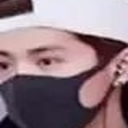

In [19]:
data[0]

In [20]:
#converting image list and label list to numpy arrays
labels = with_mask_labels + without_mask_labels
X =np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


TRAIN TEST SPLIT


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# Scaling the data

X_train_scaled = X_train/255


X_test_scaled = X_test/255

array([[[ 64,  38,  41],
        [ 67,  41,  44],
        [ 48,  22,  24],
        ...,
        [ 33,  21,  31],
        [ 34,  22,  32],
        [ 36,  21,  30]],

       [[ 76,  48,  52],
        [ 56,  29,  32],
        [ 49,  22,  24],
        ...,
        [ 33,  21,  30],
        [ 32,  21,  30],
        [ 36,  23,  32]],

       [[ 72,  43,  46],
        [ 53,  24,  27],
        [ 55,  25,  28],
        ...,
        [ 44,  31,  38],
        [ 36,  24,  32],
        [ 40,  27,  36]],

       ...,

       [[149, 181, 216],
        [148, 181, 216],
        [149, 180, 216],
        ...,
        [143, 147, 147],
        [145, 149, 151],
        [143, 147, 150]],

       [[157, 187, 223],
        [151, 181, 217],
        [145, 174, 210],
        ...,
        [155, 160, 160],
        [152, 158, 159],
        [150, 155, 158]],

       [[148, 178, 214],
        [151, 181, 217],
        [154, 183, 220],
        ...,
        [164, 171, 170],
        [162, 169, 169],
        [160, 165, 168]]], dtype=uint8)
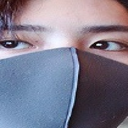

In [28]:
X_train[0]

In [29]:
X_train_scaled[0]

array([[[0.25098039, 0.14901961, 0.16078431],
        [0.2627451 , 0.16078431, 0.17254902],
        [0.18823529, 0.08627451, 0.09411765],
        ...,
        [0.12941176, 0.08235294, 0.12156863],
        [0.13333333, 0.08627451, 0.1254902 ],
        [0.14117647, 0.08235294, 0.11764706]],

       [[0.29803922, 0.18823529, 0.20392157],
        [0.21960784, 0.11372549, 0.1254902 ],
        [0.19215686, 0.08627451, 0.09411765],
        ...,
        [0.12941176, 0.08235294, 0.11764706],
        [0.1254902 , 0.08235294, 0.11764706],
        [0.14117647, 0.09019608, 0.1254902 ]],

       [[0.28235294, 0.16862745, 0.18039216],
        [0.20784314, 0.09411765, 0.10588235],
        [0.21568627, 0.09803922, 0.10980392],
        ...,
        [0.17254902, 0.12156863, 0.14901961],
        [0.14117647, 0.09411765, 0.1254902 ],
        [0.15686275, 0.10588235, 0.14117647]],

       ...,

       [[0.58431373, 0.70980392, 0.84705882],
        [0.58039216, 0.70980392, 0.84705882],
        [0.58431373, 0

Building a CONVOLUTIONAL NEURAL NETWORL(CNN)

In [30]:
import tensorflow as tf
from tensorflow import keras


In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#compile  the neural networl
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - acc: 0.6995 - loss: 0.6775 - val_acc: 0.8628 - val_loss: 0.3307
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8895 - loss: 0.2998 - val_acc: 0.8926 - val_loss: 0.3104
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9117 - loss: 0.2326 - val_acc: 0.8959 - val_loss: 0.3086
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9160 - loss: 0.2118 - val_acc: 0.8942 - val_loss: 0.3214
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9292 - loss: 0.1771 - val_acc: 0.9124 - val_loss: 0.2839


Model Evaluation

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9011 - loss: 0.2524
Test Accuracy = 0.9205824136734009


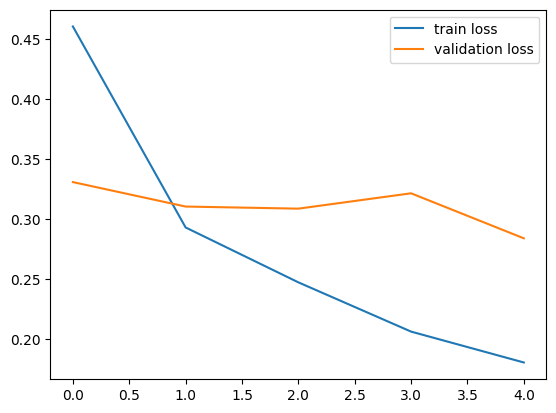

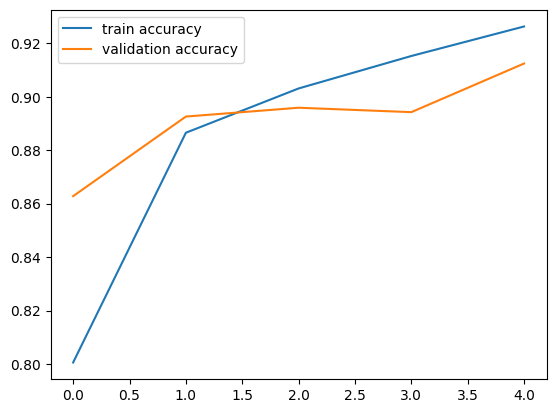

In [35]:
h = history

#plot the lose value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [ ]:
input_image_path = input("Path of the image to be Predicted: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)



if input_pred_label == 1:
 print('The person in the image is wearing mask')
else:
 print('The person in the image is not wearing mask')